In [1]:
import csv
import numpy as np

import sklearn
from sklearn.gaussian_process import GaussianProcessRegressor

from plotting_tools import plotting_feats

In [2]:
def extractData(filename):
    lst=[]
    with open(filename) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        for row in csv_reader:
            lst.append(row)
    data=np.array(lst, dtype=float)
    return data

def writeResult(filename, data):
    with open(filename, 'w') as csvfile:
        spamwriter = csv.writer(csvfile, delimiter=',')
        for row in data:
            spamwriter.writerow(row)

In [28]:
#Do this for every set and version of the csv available
xtrain = extractData('../DataFullProcess/set1_v0_x.csv')
ytrain = extractData('../DataFullProcess/set1_v0_y.csv')
xtest = extractData('../DataFullProcess/predict_v0_x.csv')
ytest = extractData('../DataFullProcess/verify_v0_y.csv')

In [29]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(xtrain)
xtrain_scaled = scaler.transform(xtrain)
scaler = preprocessing.StandardScaler().fit(xtest)
xtest_scaled = scaler.transform(xtest)

In [30]:
scaler = preprocessing.StandardScaler().fit(ytrain)
ytrain_scaled = scaler.transform(ytrain)
scaler = preprocessing.StandardScaler().fit(ytest)
ytest_scaled = scaler.transform(ytest)

In [31]:
xtrain_scaled = xtrain_scaled[:10000,:]
ytrain_scaled = ytrain_scaled[:10000,:]
xtest_scaled = xtest_scaled[:2000,:]
ytest_scaled = ytest_scaled[:2000,:]

In [32]:
from sklearn.gaussian_process.kernels import DotProduct, RationalQuadratic

In [33]:
%%time
kernel = DotProduct() + RationalQuadratic(length_scale=1.0, alpha=2, length_scale_bounds=(.1, 10), alpha_bounds=(1e-4, 4))
gpr = GaussianProcessRegressor(kernel=kernel, alpha=1e-7, optimizer='fmin_l_bfgs_b',copy_X_train=False)
gpr.fit(xtrain_scaled, ytrain_scaled)

CPU times: user 39min 30s, sys: 1min 12s, total: 40min 42s
Wall time: 11min 33s


GaussianProcessRegressor(alpha=1e-07, copy_X_train=False,
                         kernel=DotProduct(sigma_0=1) + RationalQuadratic(alpha=2, length_scale=1))

In [34]:
predicted_data, std = gpr.predict(xtest_scaled, return_std=True)
gpr.score(xtest_scaled, ytest_scaled)

0.5102767765965717

In [35]:
#then test the xtest and put the results in an array
writeResult('GPR_set1_v0.csv',predicted_data) #put the name of your method (nn, svr, gpr), and change the set that you use and the version v0,v1,v2

In [ ]:
%load_ext autoreload
%aimport plotting_tools
%autoreload 1
from plotting_tools import plotting_feats
plotting_feats(ytest_scaled, predicted_data, 'DP+RC')

In [36]:
xtrain = extractData('../DataFullProcess/set2_v0_x.csv')
ytrain = extractData('../DataFullProcess/set2_v0_y.csv')
xtest = extractData('../DataFullProcess/predict_v0_x.csv')
ytest = extractData('../DataFullProcess/verify_v0_y.csv')
scaler = preprocessing.StandardScaler().fit(xtrain)
xtrain_scaled = scaler.transform(xtrain)
scaler = preprocessing.StandardScaler().fit(xtest)
xtest_scaled = scaler.transform(xtest)
scaler = preprocessing.StandardScaler().fit(ytrain)
ytrain_scaled = scaler.transform(ytrain)
scaler = preprocessing.StandardScaler().fit(ytest)
ytest_scaled = scaler.transform(ytest)
xtrain_scaled = xtrain_scaled[:10000,:]
ytrain_scaled = ytrain_scaled[:10000,:]
xtest_scaled = xtest_scaled[:2000,:]
ytest_scaled = ytest_scaled[:2000,:]

In [37]:
%%time
kernel = DotProduct() + RationalQuadratic(length_scale=1.0, alpha=2, length_scale_bounds=(.1, 10), alpha_bounds=(1e-4, 4))
gpr = GaussianProcessRegressor(kernel=kernel, alpha=1e-7, optimizer='fmin_l_bfgs_b',copy_X_train=False)
gpr.fit(xtrain_scaled, ytrain_scaled)
predicted_data, std = gpr.predict(xtest_scaled, return_std=True)
gpr.score(xtest_scaled, ytest_scaled)

CPU times: user 43min 56s, sys: 1min 15s, total: 45min 11s
Wall time: 12min 39s


0.52244481744541

In [38]:
#then test the xtest and put the results in an array
writeResult('GPR_set2_v0.csv',predicted_data) #put the name of your method (nn, svr, gpr), and change the set that you use and the version v0,v1,v2

In [9]:
predicted_data_scaled = extractData('GPR_set1_v1.csv')
ytest = extractData('../DataFullProcess/verify_v0_y.csv')

In [11]:
scaler = preprocessing.StandardScaler().fit(ytest)
predicted_data = scaler.inverse_transform(predicted_data_scaled)

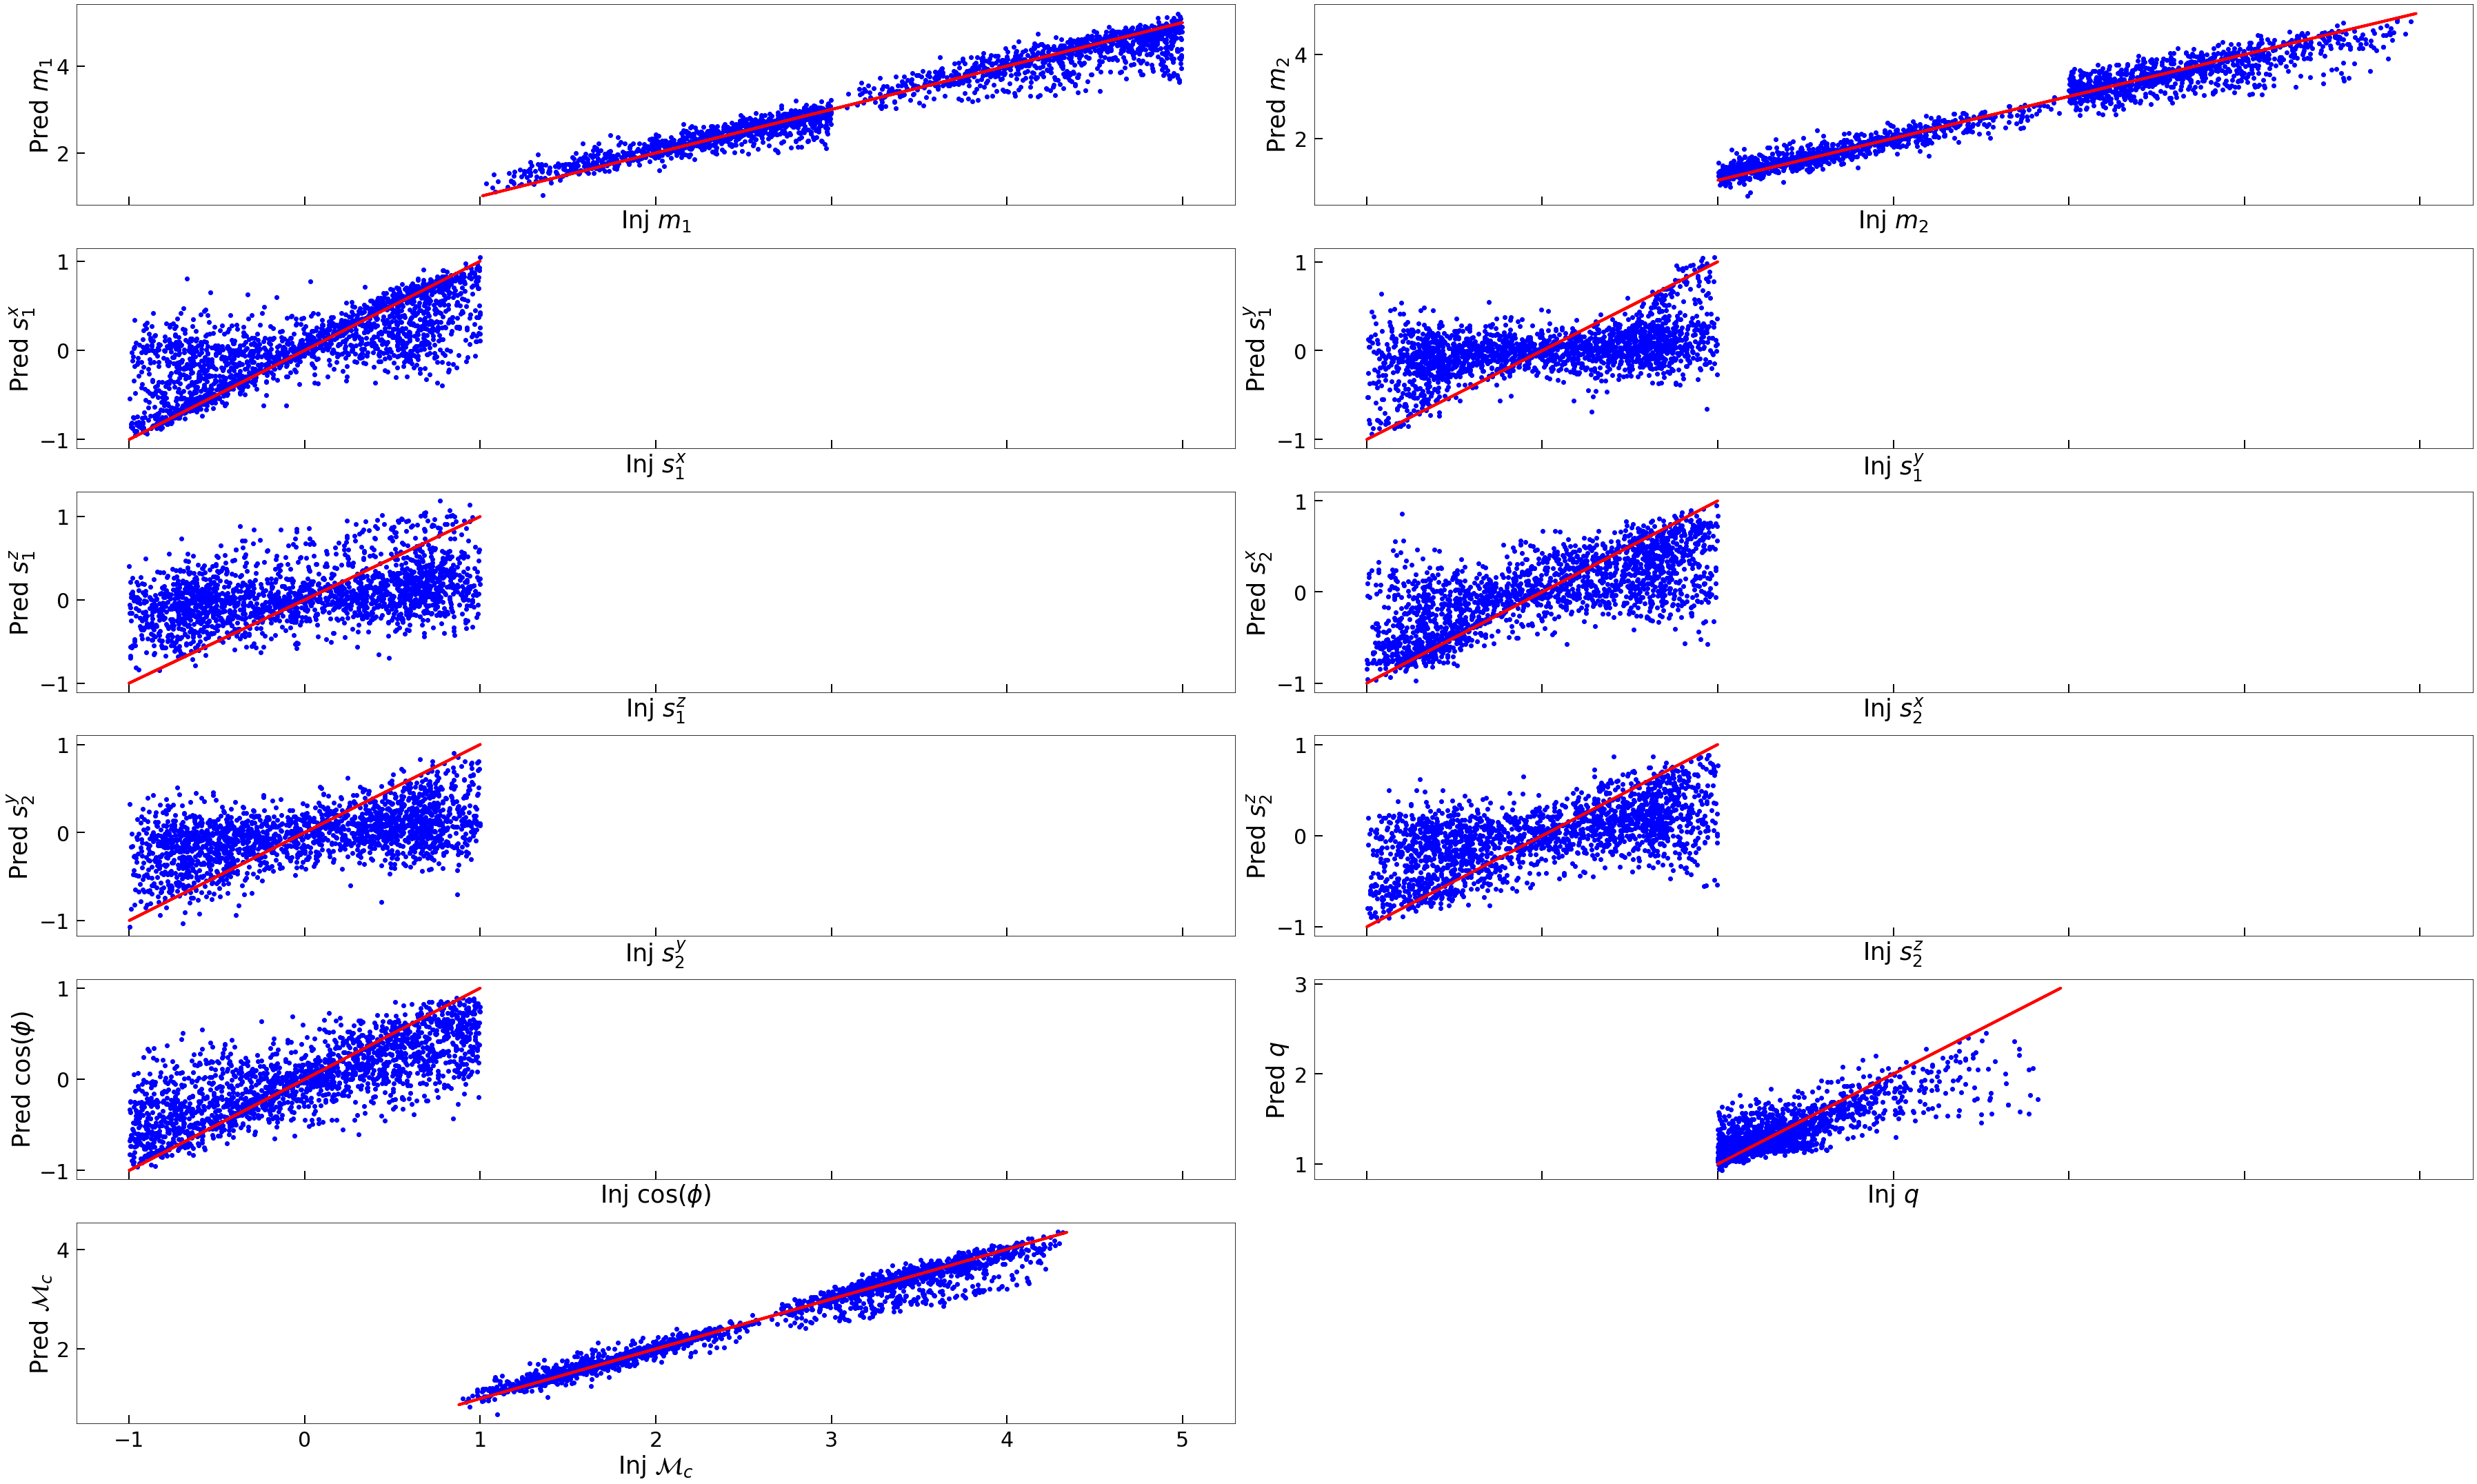

Saved figure to figures/GPR_DP+RCset1_v2.pdf


In [12]:
plotting_feats(ytest, predicted_data, 'DP+RC', 'set1_v2')